In [19]:
import pandas as pd
df=pd.read_csv("C:/Users/Wahid/Downloads/ecommerce_dataset_500_rows.csv")
df.head(5)

,OrderID,CustomerName,Product,Category,Quantity,Price,Date,Country
0,1001,Timothy Joyce,Mouse,Electronics,5,800,2025-07-15,Australia
1,1002,Mitchell Davis,Mug,Home & Living,4,500,2025-07-25,Australia
2,1003,Brittany Harris,Laptop,Electronics,5,85000,2025-07-21,USA
3,1004,Harry Hoffman,Notebook,Stationery,4,150,2025-07-15,UK
4,1005,Damon Carter,Phone Case,Accessories,4,300,2025-07-03,Australia


In [23]:
df["TotalAmount"]=df["Quantity"]*df["Price"] 
print(df)




     OrderID     CustomerName     Product       Category  Quantity  Price  \
0       1001    Timothy Joyce       Mouse    Electronics         5    800   
1       1002   Mitchell Davis         Mug  Home & Living         4    500   
2       1003  Brittany Harris      Laptop    Electronics         5  85000   
3       1004    Harry Hoffman    Notebook     Stationery         4    150   
4       1005     Damon Carter  Phone Case    Accessories         4    300   
..       ...              ...         ...            ...       ...    ...   
495     1496    Michael Smith  Phone Case    Accessories         3    300   
496     1497     Shane Snyder       Watch    Accessories         2   5000   
497     1498    Angela Brewer  Phone Case    Accessories         1    300   
498     1499   Jamie Whitaker     T-Shirt       Clothing         2   1200   
499     1500     Diane Mosley       Mouse    Electronics         3    800   

           Date    Country  TotalAmount  
0    2025-07-15  Australia       

In [24]:
df["TotalAmount"].describe()

count       500.000000
mean      39363.400000
std       98086.093223
min         150.000000
25%        1500.000000
50%        4000.000000
75%       11000.000000
max      425000.000000
Name: TotalAmount, dtype: float64

In [27]:
df[df["TotalAmount"] == 0]


,OrderID,CustomerName,Product,Category,Quantity,Price,Date,Country,TotalAmount


In [30]:
total_revenue = df["TotalAmount"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 19681700


In [32]:

top_products = df.groupby("Product")["Quantity"].sum()


top_products_sorted = top_products.sort_values(ascending=False)


top_5_products = top_products_sorted.head(5)


print("Top 5 Best-Selling Products (by Quantity Sold):")
print(top_5_products)


Top 5 Best-Selling Products (by Quantity Sold):
Product
Laptop      204
Backpack    164
Mug         158
T-Shirt     151
Watch       148
Name: Quantity, dtype: int64


In [34]:
country_revenue = df.groupby("Country")["TotalAmount"].sum()

country_revenue_sorted = country_revenue.sort_values(ascending=False)

top_5_countries = country_revenue_sorted.head(5)
print("Top 5 Countries by Revenue:")
print(top_5_countries)

Top 5 Countries by Revenue:
Country
Germany      3642850
India        3228450
Canada       3098550
UK           2345800
Australia    2286400
Name: TotalAmount, dtype: int64


In [35]:
df["Date"] = pd.to_datetime(df["Date"])

daily_sales = df.groupby("Date")["TotalAmount"].sum()

daily_sales_sorted = daily_sales.sort_index()

print("Daily Sales:")
print(daily_sales_sorted)


Daily Sales:
Date
2025-07-01     825550
2025-07-02     659800
2025-07-03     985700
2025-07-04     920350
2025-07-05    1177500
2025-07-06     391400
2025-07-07     837950
2025-07-08     876250
2025-07-09     419150
2025-07-10     803450
2025-07-11     746650
2025-07-12     292750
2025-07-13     610450
2025-07-14     130500
2025-07-15      85700
2025-07-16    1432550
2025-07-17    1164550
2025-07-18     478800
2025-07-19     157650
2025-07-20     748200
2025-07-21     947700
2025-07-22     975000
2025-07-23     767450
2025-07-24     930350
2025-07-25     575050
2025-07-26     249350
2025-07-27     499500
2025-07-28      69000
2025-07-29     441950
2025-07-30     481450
Name: TotalAmount, dtype: int64


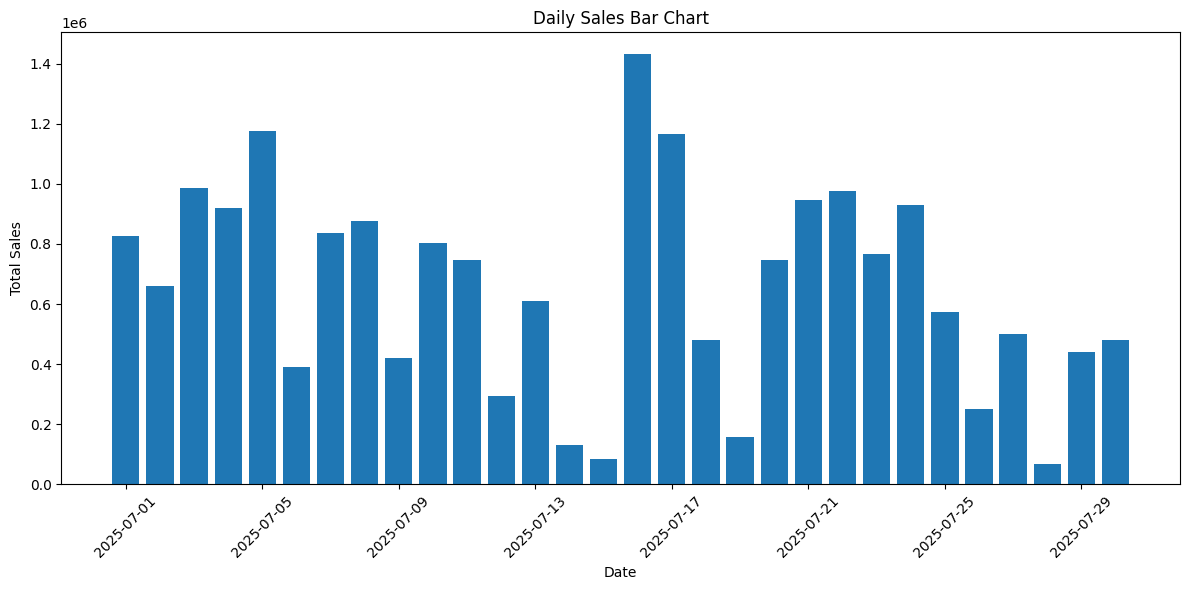

In [36]:
import matplotlib.pyplot as plt

df["Date"] = pd.to_datetime(df["Date"])

daily_sales = df.groupby("Date")["TotalAmount"].sum()

daily_sales_sorted = daily_sales.sort_index()

plt.figure(figsize=(12, 6))  
plt.bar(daily_sales_sorted.index, daily_sales_sorted.values)

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Bar Chart")
plt.xticks(rotation=45)  

plt.tight_layout()  # adjust layout
plt.show()


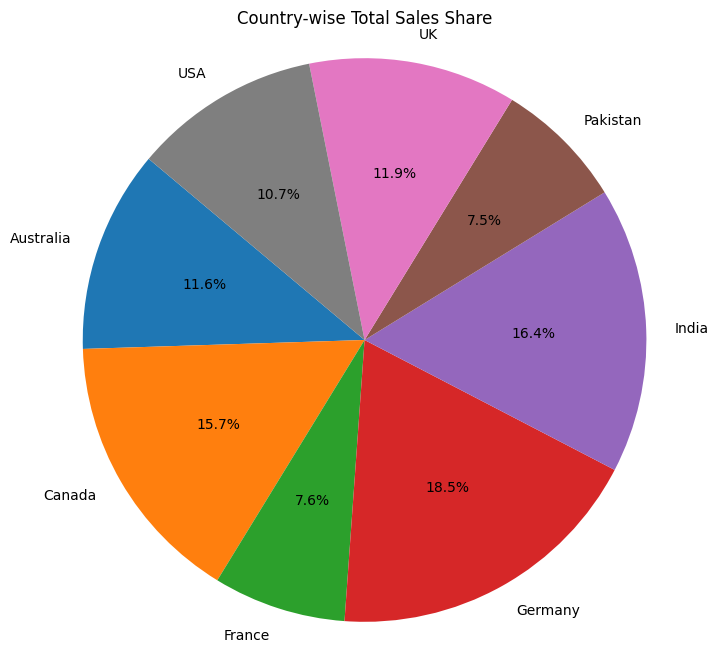

In [37]:
import matplotlib.pyplot as plt

# Step 1: Group by Country and sum TotalAmount
country_sales = df.groupby("Country")["TotalAmount"].sum()

# Step 2: Plot pie chart
plt.figure(figsize=(8, 8))  # make it a square figure
plt.pie(
    country_sales, 
    labels=country_sales.index, 
    autopct='%1.1f%%', 
    startangle=140
)

# Step 3: Add title
plt.title("Country-wise Total Sales Share")

# Step 4: Show plot
plt.axis('equal')  # Make the pie chart a circle
plt.show()



C:\Users\Wahid\AppData\Local\Temp\ipykernel_8164\1430307948.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Wahid\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


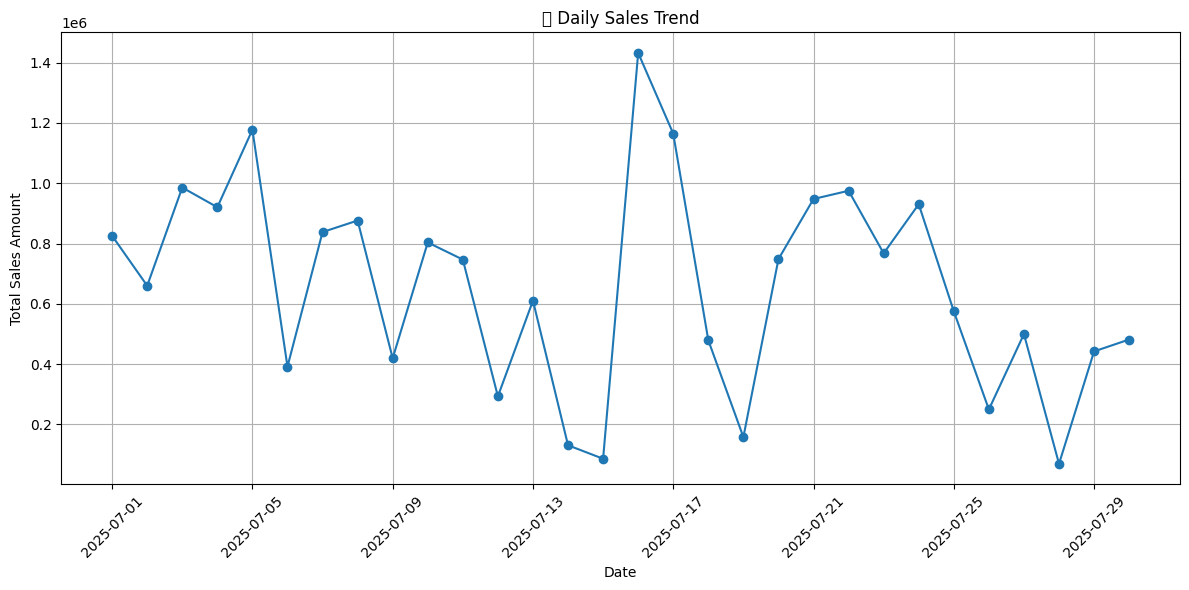

In [38]:
import matplotlib.pyplot as plt

# Step 1: Convert Date to datetime (agar pehle na kiya ho)
df["Date"] = pd.to_datetime(df["Date"])

# Step 2: Group by Date and sum the TotalAmount
daily_sales = df.groupby("Date")["TotalAmount"].sum()

# Step 3: Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')

# Step 4: Customize Chart
plt.title("📈 Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Step 5: Show Chart
plt.show()


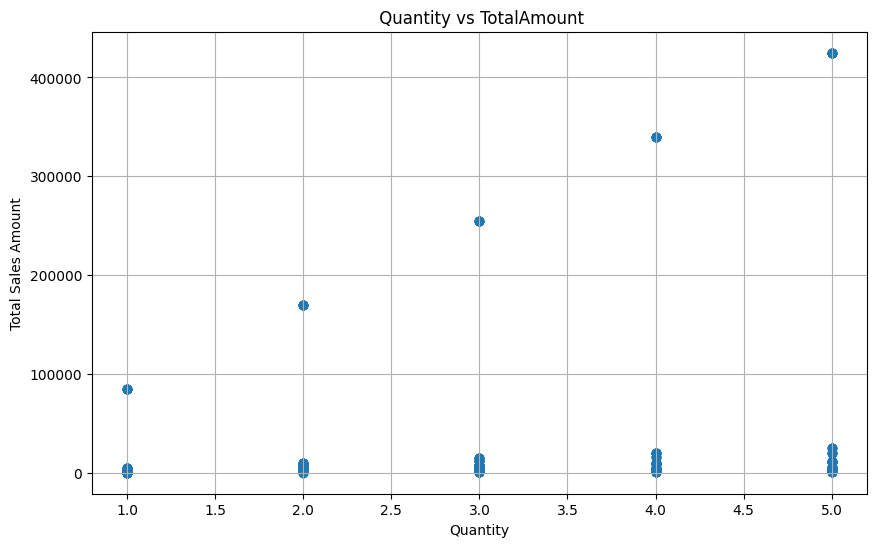

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["Quantity"], df["TotalAmount"], alpha=0.7)

plt.title(" Quantity vs TotalAmount")
plt.xlabel("Quantity")
plt.ylabel("Total Sales Amount")
plt.grid(True)

plt.show()


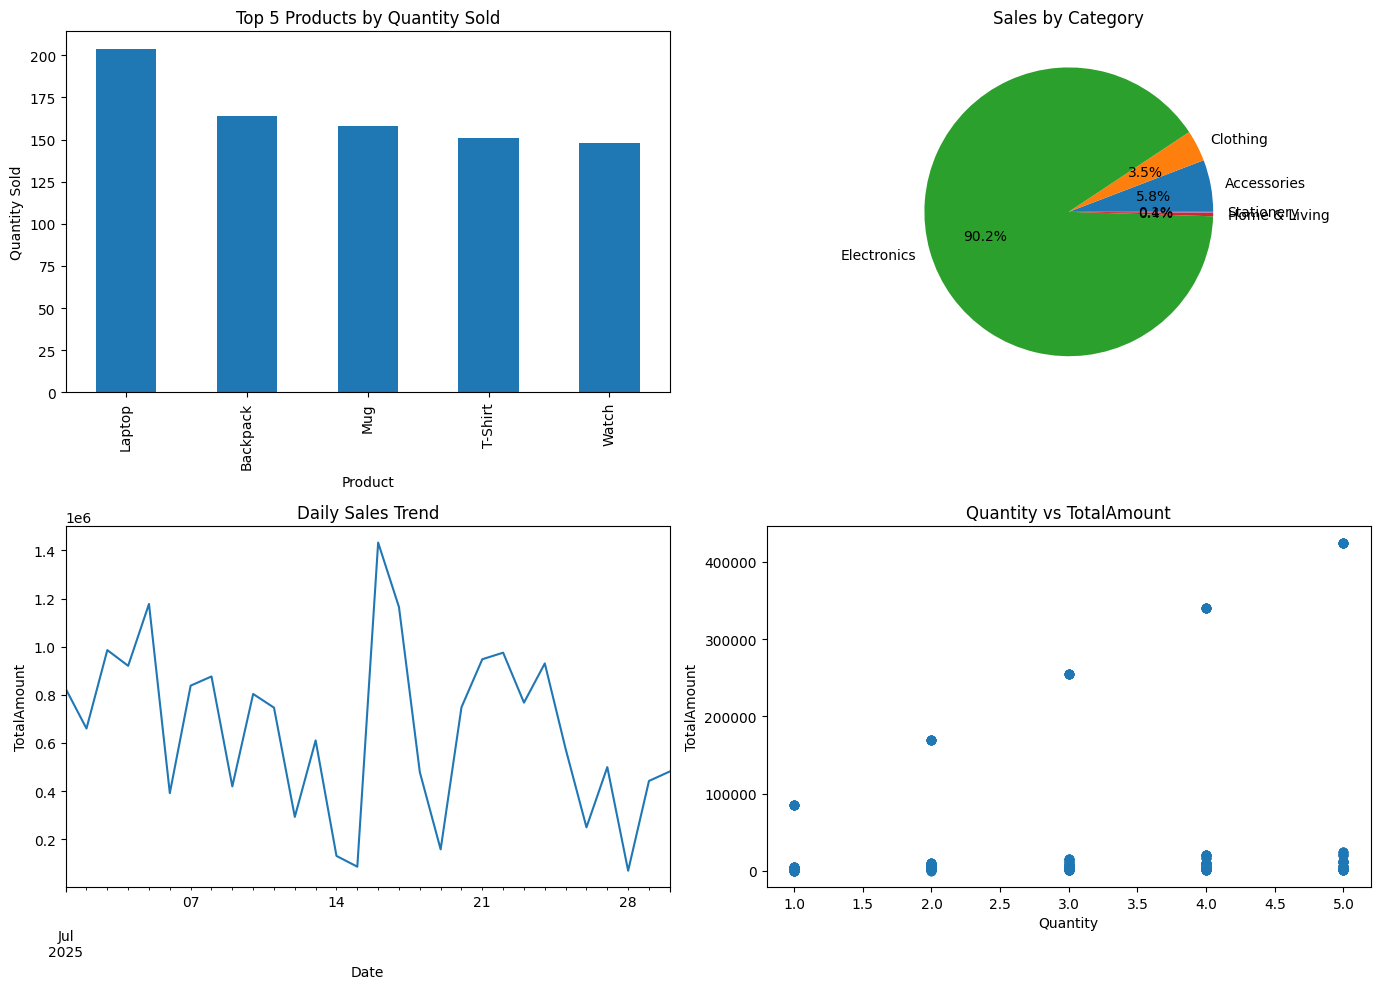

In [45]:


import matplotlib.pyplot as plt

# Create a 2x2 grid of plots
plt.figure(figsize=(14, 10))

# 🔹 1. Bar Chart (Top 5 Products by Quantity)
plt.subplot(2, 2, 1)
top_products = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(5)
top_products.plot(kind="bar")
plt.title("Top 5 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")

# 🔹 2. Pie Chart (Category-wise Sales)
plt.subplot(2, 2, 2)
category_sales = df.groupby("Category")["TotalAmount"].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title("Sales by Category")

# 🔹 3. Line Chart (Daily Sales)
plt.subplot(2, 2, 3)
daily_sales = df.groupby("Date")["TotalAmount"].sum().sort_index()
daily_sales.plot(kind="line")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("TotalAmount")

# 🔹 4. Scatter Plot (Quantity vs TotalAmount)
plt.subplot(2, 2, 4)
plt.scatter(df["Quantity"], df["TotalAmount"], alpha=0.7)
plt.title("Quantity vs TotalAmount")
plt.xlabel("Quantity")
plt.ylabel("TotalAmount")

# Adjust layout
plt.tight_layout()
plt.show()



